## Coronavirus-us-by

In [1]:
clear all

In [2]:
tempfile pop
import delimited using "https://raw.githubusercontent.com/partha-deb/COVID-19-outcomes/Data/statepopulation.csv"
save `pop'

import delimited using "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv", clear



(2 vars, 52 obs)

file C:\Users\jconn\AppData\Local\Temp\ST_2390_000001.tmp saved

(87 vars, 3,253 obs)


In [3]:
rename admin2 county
rename province_state state

reshape long v, i(state county) j(dt)
rename v deaths

gen date = date("1/22/2020","MDY") + dt-13
format date %td

collapse (sum) deaths, by(state date)

keep if inlist(state,"New York","Florida","Washington","California","Michigan","Louisiana","New Jersey","Maryland","Connecticut")




(note: j = 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 
> 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 
> 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87)

Data                               wide   ->   long
-----------------------------------------------------------------------------
Number of obs.                     3253   ->  243975
Number of variables                  87   ->      14
j variable (75 values)                    ->   dt
xij variables:
                        v13 v14 ... v87   ->   v
-----------------------------------------------------------------------------





(3,675 observations deleted)


In [4]:
merge m:1 state using `pop'
drop if _merge==2
drop _merge

gen deathspc = deaths / pop * 1000000

local ll 1
local maxdays 30

bysort state(date): gen t0 = (deathspc>`ll')
keep if t0==1

bysort state(date): gen days = _n



    Result                           # of obs.
    -----------------------------------------
    not matched                            43
        from master                         0  (_merge==1)
        from using                         43  (_merge==2)

    matched                               675  (_merge==3)
    -----------------------------------------

(43 observations deleted)






(523 observations deleted)



(The plots below may not be shown in github's rendering of jupyter notebooks. When viewing on github please hover over the circle icon at the top right corner of the file and click where it says  "Limited rendering only, external view available with nbviewer" to view full plots.)

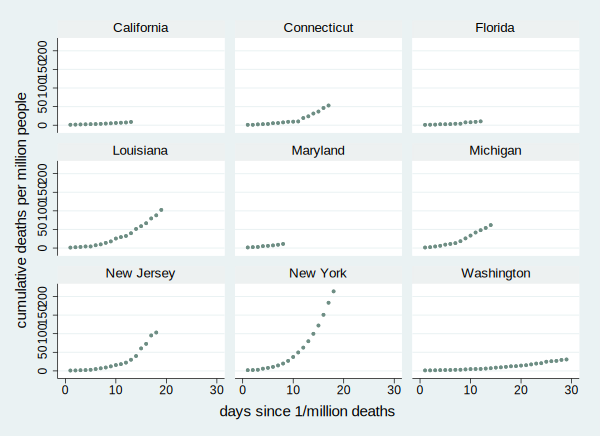

In [5]:
graph twoway scatter deathspc days if days<`maxdays', by(state, note("")) ///
	subtitle(, bcolor(gs15%50)) mcolor(teal) msize(*.5) ///
	ytitle("cumulative deaths per million people") ///
	xtitle("days since `ll'/million deaths") ///
	name(state, replace)